In [1]:
import pandas as pd 
import numpy as np 
import glob

import psycopg2
import sys
from datetime import datetime
import pandas.io.sql as psql

from db_parse import * 
from load_post import *
from pg import *

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
%matplotlib inline
from scipy.stats import binom


In [2]:
sum_parse().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103405 entries, 0 to 103404
Data columns (total 28 columns):
district_num               103405 non-null int64
formatted_api_num          103405 non-null object
operator_name              103405 non-null object
operator_code              103405 non-null object
field_name                 103405 non-null object
field_code                 103405 non-null int64
api_num                    103405 non-null int64
lease_name                 69868 non-null object
well_num                   103404 non-null object
well_status                103405 non-null object
pool_welltypes             103405 non-null object
section                    103405 non-null int64
township                   103405 non-null object
range                      103405 non-null object
base_meridian              103405 non-null object
area_code                  103405 non-null int64
area_name                  103405 non-null object
latitude                   103405 non-null fl

In [ ]:
#parse_excel('/Users/taylorphillips/Downloads/*.xlsx').info()

In [3]:
run load_post.py

In [7]:
pg_load_table('/Users/taylorphillips/galvanize/capstone/summary.csv', 'summary', 'welldata', 'localhost', 'taylorphillips')
pg_load_table('/Users/taylorphillips/galvanize/capstone/production.csv', 'production', 'welldata', 'localhost', 'taylorphillips')

Connecting to Database
Truncated summary
Loaded data into summary
DB connection closed.
Connecting to Database
Truncated production
Loaded data into production
DB connection closed.


In [8]:
run pg.py

In [10]:
df.sum()

operator_name    California Resources Elk Hills, LLCChevron U.S...
well_count                                                    2352
idle_count                                                    1222
idle_rate                                                  27.6218
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 4 columns):
operator_name    73 non-null object
well_count       73 non-null int64
idle_count       73 non-null float64
idle_rate        73 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.9+ KB


In [11]:
df10.sum()

operator_name    California Resources Elk Hills, LLCChevron U.S...
well_count                                                    2371
idle_count                                                     711
idle_rate                                                  15.7073
dtype: object

In [25]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 4 columns):
operator_name    75 non-null object
well_count       75 non-null int64
idle_count       75 non-null float64
idle_rate        75 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.9+ KB


In [40]:
samp_n = 2352
samp_x = 1222
samp_p = 1222/2352

In [41]:
samp10_n = 2371
samp10_x = 711
samp10_p = 711/2371

In [28]:
df.head()

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",534,446.0,0.835206
1,Chevron U.S.A. Inc.,443,170.0,0.383747
2,California Resources Production Corporation,224,129.0,0.575893
3,Crimson Resource Management Corp.,142,82.0,0.577465
4,"Vaquero Energy, Inc.",101,35.0,0.346535


In [29]:
df10.head()

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",535,280.0,0.523364
1,Chevron U.S.A. Inc.,446,105.0,0.235426
2,California Resources Production Corporation,225,69.0,0.306667
3,Crimson Resource Management Corp.,142,65.0,0.457746
4,"Vaquero Energy, Inc.",101,21.0,0.207921


In [30]:
df.sort_values(by='idle_count', ascending=False).head(10)

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",534,446.0,0.835206
1,Chevron U.S.A. Inc.,443,170.0,0.383747
2,California Resources Production Corporation,224,129.0,0.575893
3,Crimson Resource Management Corp.,142,82.0,0.577465
6,E & B Natural Resources Management Corporation,93,49.0,0.526882
4,"Vaquero Energy, Inc.",101,35.0,0.346535
5,Bellaire Oil Company,99,35.0,0.353535
12,"Berry Petroleum Company, LLC",31,24.0,0.774194
13,Holmes Western Oil Corporation,26,22.0,0.846154
20,Alon Bakersfield Property Inc.,21,20.0,0.952381


In [31]:
df.sort_values(by='idle_rate', ascending=False).head(10)

,operator_name,well_count,idle_count,idle_rate
72,"CMO, Inc.",1,1.0,1.0
69,"Strata-X, Inc.",1,1.0,1.0
67,Andrew L. Newkirk,1,1.0,1.0
66,Valid Energy Company,1,1.0,1.0
65,"Bennett Petroleum, Inc.",1,1.0,1.0
63,"TS Leasing Operations, Inc.",1,1.0,1.0
60,"Big West of California, LLC",2,2.0,1.0
57,"Campo Verde Oil, Inc.",2,2.0,1.0
56,"J.P. Oil Company, LLC",2,2.0,1.0
43,"Summit Energy, LLC",4,4.0,1.0


In [32]:
x = df['well_count']
y = df['idle_rate']
z = df['idle_count']
x2 = df10['well_count']
y2 = df10['idle_rate']
z2 = df10['idle_count']

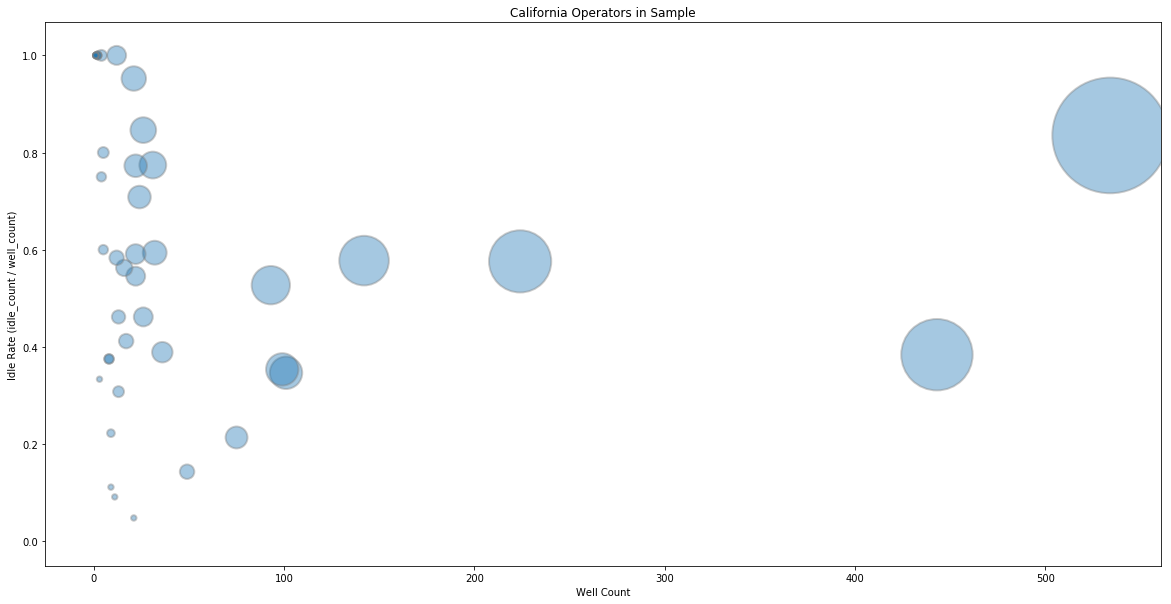

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=z*30, alpha=.4, edgecolors="grey", linewidth=2)
plt.xlabel("Well Count")
plt.ylabel("Idle Rate (idle_count / well_count)")
plt.title('California Operators in Sample')
plt.show()


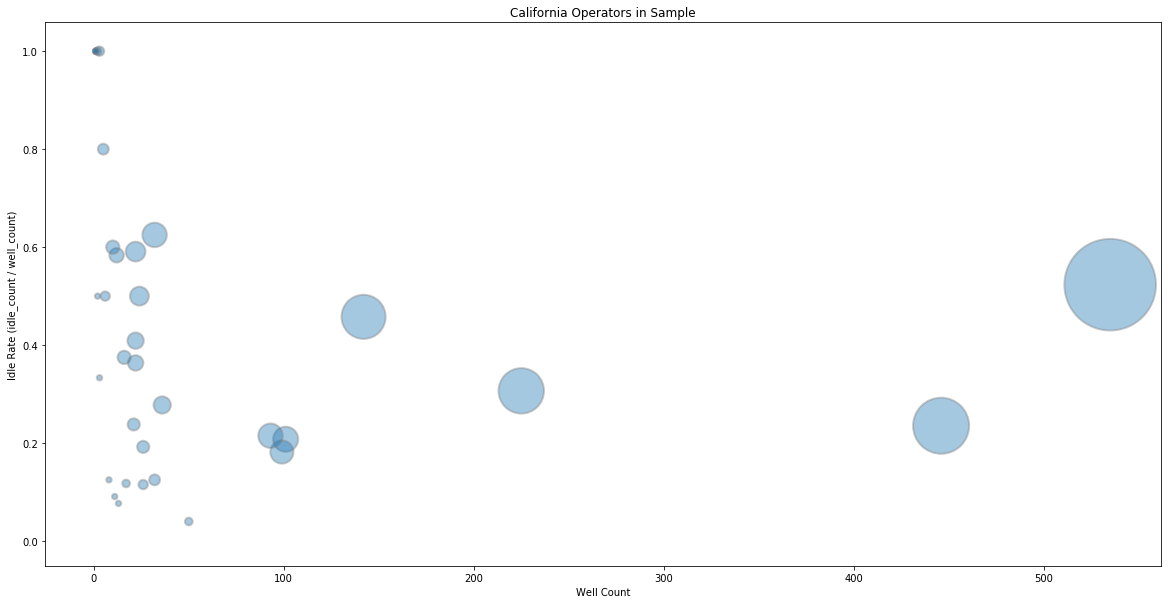

In [34]:
plt.figure(figsize=(20,10))
plt.scatter(x2, y2, s=z2*30, alpha=.4, edgecolors="grey", linewidth=2)
plt.xlabel("Well Count")
plt.ylabel("Idle Rate (idle_count / well_count)")
plt.title('California Operators in Sample')
plt.show()

In [35]:
samp_var = samp_n * samp_p * (1 - samp_p)
samp_var

587.1003401360545

In [37]:
samp10_var = samp10_n * samp10_p * (1 - samp10_p)
samp10_var

497.7899620413328

In [44]:
p = 30000 / 103405

In [47]:
stats.binom_test(samp_x, n=samp_n, p=p, alternative='greater')

5.936668988722371e-120

In [48]:
stats.binom_test(samp10_x, n=samp10_n, p=p, alternative='greater')

0.15301161169114375